In [1]:
# 1단계: 필요한 데이터 다운로드
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

# 2단계: 데이터 탐색
from nltk.corpus import movie_reviews

# 데이터셋 크기 파악
print(f"전체 영화 리뷰 수: {len(movie_reviews.fileids())}")
print(f"카테고리: {movie_reviews.categories()}")  # ['neg', 'pos']
print(f"부정 리뷰: {len(movie_reviews.fileids(categories='neg'))}개")
print(f"긍정 리뷰: {len(movie_reviews.fileids(categories='pos'))}개")

# 3단계: 첫 번째 리뷰 살펴보기
first_review_id = movie_reviews.fileids()[0]
first_review = movie_reviews.raw(first_review_id)
print(f"\n첫 번째 리뷰 ID: {first_review_id}")
print(f"원문 일부:\n{first_review[:200]}")

# 4단계: 토큰화 결과 확인
sentences = movie_reviews.sents(first_review_id)  # 문장 단위 토큰화
words = movie_reviews.words(first_review_id)      # 단어 단위 토큰화

print(f"\n문장 토큰화 (첫 2개):")
for i, sent in enumerate(sentences[:2]):
    print(f"  {i+1}: {sent}")

print(f"\n단어 토큰화 (첫 20개): {words[:20]}")

전체 영화 리뷰 수: 2000
카테고리: ['neg', 'pos']
부정 리뷰: 1000개
긍정 리뷰: 1000개

첫 번째 리뷰 ID: neg/cv000_29416.txt
원문 일부:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

문장 토큰화 (첫 2개):
  1: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
  2: ['they', 'get', 'into', 'an', 'accident', '.']

단어 토큰화 (첫 20개): ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khh11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# RegexpTokenizer: 정규표현식으로 정확한 토큰화
# stopwords : 문법적 기능을 제거하고 단어에 집중
# 상위 N개 단어 선택 : 메모리효율성과 노이즈 제거의 균형

In [3]:
# BOW - 수동으로 벡터 생성
# 1단계: 모든 문서를 단어 리스트로 변환
documents = [list(movie_reviews.words(fileid)) 
             for fileid in movie_reviews.fileids()]

print(f"전체 문서 수: {len(documents)}")
print(f"첫 문서의 단어 수: {len(documents[0])}")
print(f"첫 문서의 첫 50개 단어:\n{documents[0][:50]}")

# 2단계: 전체 단어 빈도 계산 (불용어 제외 전)
word_count = {}
for doc in documents:
    for word in doc:
        word_count[word] = word_count.get(word, 0) + 1

# 상위 10개 빈도 단어 확인
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print("\n상위 10개 빈도 단어:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 3단계: 불용어 제거 후 처리
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# 정규표현식으로 3글자 이상의 단어만 추출
tokenizer = RegexpTokenizer(r"[\w']{3,}")
# 영어 불용어 로드
english_stops = set(stopwords.words('english'))

# 모든 리뷰를 토큰화하고 불용어 제거
processed_documents = []
for fileid in movie_reviews.fileids():
    raw_text = movie_reviews.raw(fileid)
    tokens = [token for token in tokenizer.tokenize(raw_text) 
              if token not in english_stops]
    processed_documents.append(tokens)

# 처리 후 단어 빈도 재계산
word_count_processed = {}
for doc in processed_documents:
    for word in doc:
        word_count_processed[word] = word_count_processed.get(word, 0) + 1

sorted_processed = sorted(word_count_processed.items(), 
                         key=lambda x: x[1], reverse=True)

print(f"\n전체 서로 다른 단어 수: {len(sorted_processed)}")
print("\n처리 후 상위 10개 단어:")
for i, (word, count) in enumerate(sorted_processed[:10], 1):
    print(f"  {i}. '{word}': {count}회")

# 4단계: 특성 선택 (상위 1000개 단어)
word_features = [word for word, count in sorted_processed[:1000]]
print(f"\n특성으로 선택된 단어 수: {len(word_features)}")
print(f"특성 예시: {word_features[:20]}")

전체 문서 수: 2000
첫 문서의 단어 수: 879
첫 문서의 첫 50개 단어:
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']

상위 10개 빈도 단어:
  1. ',': 77717회
  2. 'the': 76529회
  3. '.': 65876회
  4. 'a': 38106회
  5. 'and': 35576회
  6. 'of': 34123회
  7. 'to': 31937회
  8. ''': 30585회
  9. 'is': 25195회
  10. 'in': 21822회

전체 서로 다른 단어 수: 43011

처리 후 상위 10개 단어:
  1. 'film': 8935회
  2. 'one': 5791회
  3. 'movie': 5538회
  4. 'like': 3690회
  5. 'even': 2564회
  6. 'time': 2409회
  7. 'good': 2407회
  8. 'story': 2136회
  9. 'would': 2084회
  10. 'much': 2049회

특성으로 선택된 단어 수: 1000
특성 예시: ['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', '

In [4]:
# processed_documents[0]  # 문장을 토큰화(3개의 연속된 문장, 불용어제거)
for doc in processed_documents[:5]:
    print(len(doc), end=" ")

323 130 262 278 391 

In [5]:
processed_documents[0][:3]

['plot', 'two', 'teen']

In [6]:
# 각 문서의 고정된 길이의 벡터로 변환(모든 문서가 같은 차원 )
# 기계학습 알고리즘의 입력 형식으로 변환
def document_features(document, word_features):
    """
    문서를 특성 벡터로 변환
    
    Args:
        document: 토큰화된 단어 리스트
        word_features: 특성으로 사용할 단어 리스트
    
    Returns:
        document의 각 특성에 대한 빈도 리스트
    """
    # 문서 내 단어 빈도 계산
    word_count = {}
    for word in document:
        word_count[word] = word_count.get(word, 0) + 1
    
    # 특성 벡터 생성
    features = []
    for word in word_features:
        # 특성 단어가 문서에 없으면 0
        features.append(word_count.get(word, 0))
    
    return features

# 테스트 실행
test_features = ['one', 'two', 'teen', 'couples', 'solo']
test_doc = ['two', 'two', 'couples']
result = document_features(test_doc, test_features)

print("테스트 단어 리스트:", test_features)
print("테스트 문서:", test_doc)
print("결과 벡터:", result)
print("→ 'two'가 2번, 'couples'가 1번, 나머지는 0")

# 모든 문서에 대해 특성 벡터 생성
feature_sets = [document_features(doc, word_features) 
                 for doc in processed_documents]

print(f"\n생성된 특성 벡터 수: {len(feature_sets)}")
print(f"각 벡터의 차원: {len(feature_sets[0])}")
print(f"\n첫 문서 벡터 (처음 20개):")
for i, (word, count) in enumerate(zip(word_features[:20], feature_sets[0][:20])):
    print(f"  '{word}': {count}")

테스트 단어 리스트: ['one', 'two', 'teen', 'couples', 'solo']
테스트 문서: ['two', 'two', 'couples']
결과 벡터: [0, 2, 0, 1, 0]
→ 'two'가 2번, 'couples'가 1번, 나머지는 0

생성된 특성 벡터 수: 2000
각 벡터의 차원: 1000

첫 문서 벡터 (처음 20개):
  'film': 5
  'one': 3
  'movie': 6
  'like': 3
  'even': 3
  'time': 0
  'good': 2
  'story': 0
  'would': 1
  'much': 0
  'also': 1
  'get': 3
  'character': 1
  'two': 2
  'well': 1
  'first': 0
  'characters': 1
  'see': 2
  'way': 3
  'make': 5


In [7]:
word_features[:3],  feature_sets[0][:3],  len(word_features), len(feature_sets[0])

(['film', 'one', 'movie'], [5, 3, 6], 1000, 1000)

In [8]:
# 1 데이터 준비
reivews = [  movie_reviews.raw(fileid) for fileid in movie_reviews.fileids() ]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=word_features)
reviews_cv = cv.fit_transform(reivews)
print(f'특성수 : {cv.get_feature_names_out()[:5]}')
reviews_cv.shape

특성수 : ['film' 'one' 'movie' 'like' 'even']


(2000, 1000)

In [9]:
# https://drive.google.com/file/d/1KOKgZ4qCg49bgj1QNTwk1Vd29soeB27o/view?usp=sharing

In [10]:
import pandas as pd
url = "https://drive.google.com/uc?id=1KOKgZ4qCg49bgj1QNTwk1Vd29soeB27o"
df = pd.read_csv(url)

In [11]:
df.head(2)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워


In [12]:
sample_review = df.review[1]
sample_review

'몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.'

In [13]:
from konlpy.tag import Okt
okt = Okt()

In [14]:
# 명사만 추출
okt.nouns(sample_review)

['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

In [15]:
okt.pos(sample_review)

[('몰입', 'Noun'),
 ('할수밖에', 'Verb'),
 ('없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('어렵게', 'Adjective'),
 ('생각', 'Noun'),
 ('할', 'Verb'),
 ('필요없다', 'Adjective'),
 ('.', 'Punctuation'),
 ('내', 'Noun'),
 ('가', 'Josa'),
 ('전투', 'Noun'),
 ('에', 'Josa'),
 ('참여', 'Noun'),
 ('한', 'Determiner'),
 ('듯', 'Noun'),
 ('손', 'Noun'),
 ('에', 'Josa'),
 ('땀', 'Noun'),
 ('이남', 'Noun'),
 ('.', 'Punctuation')]

In [16]:
# 명사 동사 형용사  Noun Verb Adjective
[word for word, tag in okt.pos(sample_review) if tag in ['Noun',  'Verb',  'Adjective']]

['몰입',
 '할수밖에',
 '없다',
 '어렵게',
 '생각',
 '할',
 '필요없다',
 '내',
 '전투',
 '참여',
 '듯',
 '손',
 '땀',
 '이남']

In [17]:
def custom_tokenizer(doc) :
    '''
    커스텀 코드나이저
    '''
    return [word for word, tag in okt.pos(doc) if tag in ['Noun',  'Verb',  'Adjective']]

In [18]:
# CountVectorizer에 커스텀 코드나이저 적용
daum_cv = CountVectorizer(max_features=1000, tokenizer=custom_tokenizer)
review_cv = daum_cv.fit_transform(df.review)
review_cv.shape

c:\Users\khh11\miniconda3\envs\pyt_env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(14725, 1000)

In [19]:
# 코사인 유사도 -1 ~ 1 사이의 값으로 벡터간 각도 기반 유사도 계산
# 0에 가까운 값 : 직교(무관) 1에 가까우면 같은 방향
# 모든 유사도를 계산 : 상위 N개 결과 도출 (추천 시스템의 기초)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
reviews = df.review.copy().to_list()
original_review = reviews[1]

midpoint = len(original_review) // 2
query_text = original_review[midpoint:]
print(query_text)

# 벡터로 변환
query_vector = daum_cv.transform([query_text])
display(query_vector)

다. 내가 전투에 참여한듯 손에 땀이남.


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 1000)>

In [21]:
# 모든 리뷰와 유사도 계산
similarity_score = cosine_similarity(query_vector, review_cv)
similarity_score.shape

(1, 14725)

In [22]:
similarity_score.max()

np.float64(0.6546536707079772)

In [23]:
from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
url = "https://drive.google.com/uc?id=1KOKgZ4qCg49bgj1QNTwk1Vd29soeB27o"
df = pd.read_csv(url)
okt = Okt()
def custom_tokenizer(doc):
    """
    형태소 분석 후 명사, 동사, 형용사만 추출
    """
    pos_tags = okt.pos(doc)
    tokens = [word for word, pos in pos_tags 
              if pos in ['Noun', 'Verb', 'Adjective']]
    return tokens

daum_cv = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer
)

reviews = df.review
daum_dtm  = daum_cv.fit_transform(reviews)
original_review = reviews[0]  # 첫 번째 리뷰
print(f"원본 리뷰 (처음 200자):\n{original_review[:200]}\n")

# 문서의 뒤 절반을 query로 사용 (부분 검색 시나리오)
midpoint = len(original_review) // 2
query_text = original_review[midpoint:]  # 뒤 절반
print(f"쿼리 텍스트 (처음 150자):\n{query_text[:150]}\n")

# 2단계: 쿼리 문서를 벡터로 변환
query_vector = daum_cv.transform([query_text])
print(f"쿼리 벡터 크기: {query_vector.shape}")

# 유사도 분석
scores = cosine_similarity(query_vector,daum_dtm)
# most_simular_idx = np.argmax(scores[0])
# scores[most_simular_idx], reviews[most_simular_idx]

display(query_text)
print(np.array(reviews)[scores[0].argsort()[::-1][:5]])

c:\Users\khh11\miniconda3\envs\pyt_env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


원본 리뷰 (처음 200자):
돈 들인건 티가 나지만 보는 내내 하품만

쿼리 텍스트 (처음 150자):
만 보는 내내 하품만

쿼리 벡터 크기: (1, 1000)


'만 보는 내내 하품만'

['보는 내내 설레였다' '보는 내내 너무 괴로웠다' '여전한 군바리 국가지배...보는 내내 슬펐다.' '보는 내내 눈시울이 ㅠㅠ'
 '돈 들인건 티가 나지만 보는 내내 하품만']


In [24]:
# 계산 TF-IDF
# 단어의 상대적 중요도를 반영한 벡터화 기법
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
# TF : 특정 단어가 문서에서 얼마나 자주 나타나는지 비율
# 해당 단어의 빈도 / 문서의 전체 단어 수    좋다 문서에서 10번 해당문서는 100단어 10/100
# IDF (Inverse Document Frequency) 단어가 전체 문장에서 얼마나 드문 (희귀)
# log(전체문서 / 해당 단어 포함 문서) 단어의 가중치를 낮추기 위해서 log 적용
# 2000개 문서 중 100개만 "좋다" log(2000/100) = 2.00
# TF-IDF    TF × IDF -> 특정 문서에서 의미 있는 단어에 높은 가중치 부여

In [25]:
count_cv = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer
)
count_dtm = count_cv.fit_transform(reviews)

tfidf_cv = TfidfVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer
)
tfidf_dtm = tfidf_cv.fit_transform(reviews)

count_dtm.shape, tfidf_dtm.shape

((14725, 1000), (14725, 1000))

In [26]:
# 쿼리 벡터화
query_count = count_cv.transform([query_text])
query_tfidf = tfidf_cv.transform([query_text])

# 코사인 유사도 계산
count_sim = cosine_similarity(query_count, count_dtm)[0]
tfidf_sim = cosine_similarity(query_tfidf, tfidf_dtm)[0]

In [27]:
a = np.array([1, 2, 3, 4, 5])
print(a.argsort())
print((-a).argsort())

[0 1 2 3 4]
[4 3 2 1 0]


In [28]:
top5_count_index = (-count_sim).argsort()[:5]
top5_tfidf_index = (-tfidf_sim).argsort()[:5]

In [29]:
reviews = np.array(reviews)

print(reviews[top5_count_index][1:])
print(reviews[top5_tfidf_index][1:])

['여전한 군바리 국가지배...보는 내내 슬펐다.' '보는 내내 너무 괴로웠다' '보는 내내 눈시울이 ㅠㅠ'
 '돈 들인건 티가 나지만 보는 내내 하품만']
['여전한 군바리 국가지배...보는 내내 슬펐다.' '보는 내내 설레였다' '보는 내내 눈시울이 ㅠㅠ' '보는 내내 너무 괴로웠다']


In [30]:
my_review = '숙면하기 좋은 영화.. 강추..'
# my_review count 또는 tf-idf 방식으로 벡터화
# 이후 전체 리뷰를 각 방식의 벡터화에 맞춰 함께 유사도 방식으로 점수를 구해서 상위 N개의 문서를 출력

# 쿼리 벡터화
query_count = count_cv.transform([my_review])
query_tfidf = tfidf_cv.transform([my_review])

# 코사인 유사도 계산
count_sim = cosine_similarity(query_count, count_dtm)[0]
tfidf_sim = cosine_similarity(query_tfidf, tfidf_dtm)[0]

top5_count_index = (-count_sim).argsort()[:5]
top5_tfidf_index = (-tfidf_sim).argsort()[:5]

reviews = np.array(reviews)

display_df = pd.DataFrame({'Count' : reviews[top5_count_index][1:], 'TF-IDF' : reviews[top5_tfidf_index][1:]})
display_df

,Count,TF-IDF
0,너무 좋은 영화네요,강추 영화네요^^
1,아이디어만 좋은 영화.,강추
2,좋은영화,강추!!
3,좋은 영화.,강추!


In [ ]:
# N-gram 연속된 N개의 단위

# 영화가 정말 재미있다
# unigram 1-gram
# [영화][가][정말][재미있다]

# Bigram(2-gram)
# [영화 가] [가 정말] [정말 재미있다]

# Trigram(3-gram)
# [영화 가 정말][가 정말 재미있다]

# 특성
# 문맥정보 포함 : 단서의 순서와 관계를 반영
# 더 나은 분류 : 좋은 영화 나쁜영화 구분
# 의미 보존 : 인접한 단어들의 의존성 보존


In [32]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

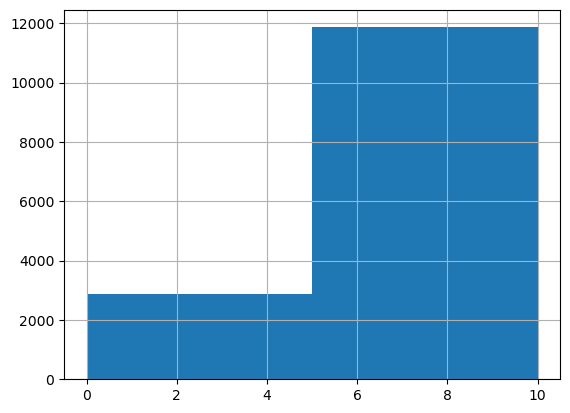

In [35]:
df.rating.hist(bins=2)

In [59]:
df['label'] = (df.rating >= 5).astype(int)

df.tail(2)

,review,rating,date,title,label
14723,간만에 제대로 잘짜여진 각본의 영화를 봤네 여운이 아직도 남아~어른을 위한 애니~,10,2018.01.12,코코,1
14724,한국개봉을 눈빠지게 기다린 보람이있다 깨우치는게 많은 영화,10,2018.01.12,코코,1


In [60]:
def explain_ngrams(text, n_values=[1, 2, 3]):
    """N-gram을 이해하기 쉽게 설명"""
    tokens = okt.morphs(text)
    
    print(f"\n원본 텍스트: '{text}'")
    print(f"형태소 토큰: {tokens}\n")
    
    for n in n_values:
        ngrams = [' '.join(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]
        print(f"{n}-gram ({['Unigram', 'Bigram', 'Trigram'][n-1]}):")
        print(f"  총 {len(ngrams)}개: {ngrams}")
        if len(ngrams) <= 10:
            for i, gram in enumerate(ngrams, 1):
                print(f"    {i}. [{gram}]")
        print()

# 샘플 텍스트에 대한 N-gram 설명
sample_review = "영화가 정말 재미있다"
explain_ngrams(sample_review)


원본 텍스트: '영화가 정말 재미있다'
형태소 토큰: ['영화', '가', '정말', '재미있다']

1-gram (Unigram):
  총 4개: ['영화', '가', '정말', '재미있다']
    1. [영화]
    2. [가]
    3. [정말]
    4. [재미있다]

2-gram (Bigram):
  총 3개: ['영화 가', '가 정말', '정말 재미있다']
    1. [영화 가]
    2. [가 정말]
    3. [정말 재미있다]

3-gram (Trigram):
  총 2개: ['영화 가 정말', '가 정말 재미있다']
    1. [영화 가 정말]
    2. [가 정말 재미있다]



In [61]:
# 벡터화 n-gram별 벡터화 및 특성 비교

def tokenizer_morphs(text):
    '''형태소 기반 토크나이져'''
    return okt.morphs(text)

# 1-gram 
vec_1gram = TfidfVectorizer(tokenizer=tokenizer_morphs, ngram_range=(1,1), max_features=50)
X_1gram = vec_1gram.fit_transform(df.review)
print(f'차원 : {X_1gram.shape}')
features_1gram = vec_1gram.get_feature_names_out()[:20]
print(f"{', '.join(features_1gram)}")

차원 : (14725, 50)
!, ,, ., .., ..., ?, cg, ~, 가, 감동, 것, 고, 과, 그, 너무, 눈물, 는, 다, 더, 도


In [62]:
# 2-gram 
vec_2gram = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1,2), max_features=1000)
X_2gram = vec_2gram.fit_transform(df.review)
print(f'차원 : {X_2gram.shape}')
features_2gram = vec_2gram.get_feature_names_out()
bigram = [f for f in features_2gram if len(f.split()) > 1][:15]
print(f"{', '.join(bigram)}")

차원 : (14725, 1000)
가는 줄, 가는줄 모르고, 가슴 먹, 감동 영화, 감동 입니다, 감동 있고, 감동 재미, 강철 비, 같은 영화, 것 같다, 것 같아요, 공포 영화, 광주 민주화, 광주 시민, 괜찮은 영화


In [54]:
# 데이터분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df.review, df.label, test_size=0.2, stratify=df.label, random_state=42)

In [63]:
#1 gram 모델
from sklearn.linear_model import LogisticRegression
vec_1 = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1,1),max_features=1000)
x_train_1 = vec_1.fit_transform(x_train)
x_test_1 = vec_1.transform(x_test)

clf_1 = LogisticRegression()
clf_1.fit(x_train_1,y_train)
clf_1.score(x_test_1,y_test)

0.8492359932088285

In [64]:
from sklearn.metrics import classification_report
predict_1 = clf_1.predict(x_test_1)
print( classification_report(y_test, predict_1) )

              precision    recall  f1-score   support

           0       0.72      0.37      0.49       572
           1       0.86      0.97      0.91      2373

    accuracy                           0.85      2945
   macro avg       0.79      0.67      0.70      2945
weighted avg       0.84      0.85      0.83      2945



In [ ]:
# 2-gram 
vec_2gram = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(2,2), max_features=1000)
X_2gram = vec_2gram.fit_transform(df.review)
print(f'차원 : {X_2gram.shape}')
features_2gram = vec_2gram.get_feature_names_out()
bigram = [f for f in features_2gram if len(f.split()) > 1][:15]
print(f"{', '.join(bigram)}")

차원 : (14725, 1000)
가는 줄, 가는줄 모르게, 가는줄 모르고, 가면 갈수록, 가슴 먹, 가슴 아픈, 가족 끼리, 가족 대한, 가족 보기, 가족 사랑, 가족 소중함을, 가족 애, 감 정선, 감독 연출, 감독 영화
